# Instructions to Activate Conda Environment and Install Required Packages

## Step 1: Activate Conda Environment

1. Open your terminal or command prompt.

2. Create a new conda environment with Python version 3.8.18 (if you haven't already):

    ```sh
    conda create --name myenv python=3.8.18
    ```

3. Activate the newly created conda environment:

    ```sh
    conda activate myenv
    ```

## Step 2: Install Required Packages

1. Ensure you are in the root directory of your project where `dependencies.sh` is located.

2. Run the `dependencies.sh` script to install the required packages:

    ```sh
    sh dependencies.sh
    ```

That's it! Your conda environment should now be activated with Python 3.8.18, and the required packages should be installed.



In [1]:
from denoisers.NLM import *
from PIL import *
from iterative_algorithms import *
from forward_models import *
import matplotlib.pyplot as plt
import pickle


In [2]:
image_id = 17 
#read the image
image = Image.open("./images/{}.png".format(image_id))
#convert the image to a numpy array
image = np.array(image)
#to double
image = image.astype(np.float64)
#to range 0 to 1P_operator
image = image/255.0




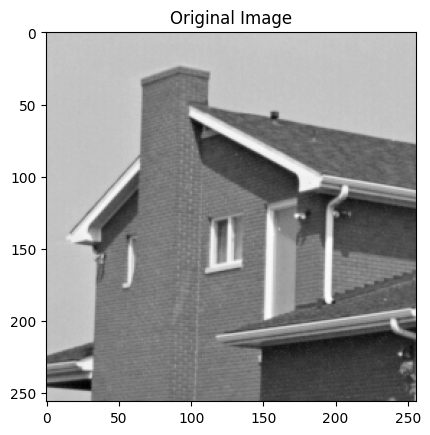

In [3]:
#ploy the image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()


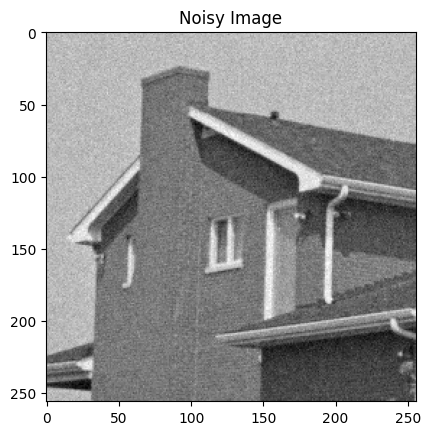

In [4]:
#Create a noisy image
sigma = 10/255.0
noisy_image_10 = image + sigma*np.random.randn(*image.shape)
noisy_image_10 = np.clip(noisy_image_10, 0, 1)  
plt.imshow(noisy_image_10, cmap='gray')
plt.title("Noisy Image")
plt.show()

In [5]:
def PSNR(image, denoised_image):
    mse = np.mean((image-denoised_image)**2)
    psnr = 10*np.log10(1/mse)
    return psnr
PSNR(image, noisy_image_10)

28.177660438384528

In [6]:
#Set Parameters for the denoiser
patch = 3
window = 10
sigma = 120.0/255.0
dn = {"guide_image":noisy_image_10, "patch_rad":patch, "window_rad": window, "sigma": sigma}

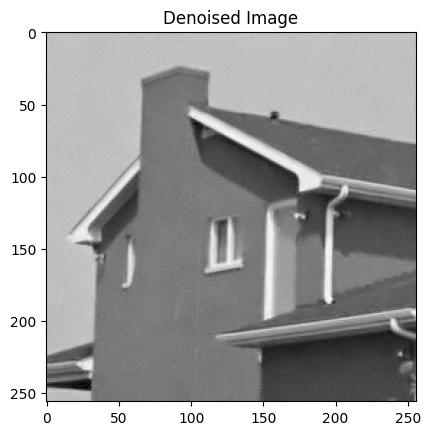

28.177660438384528


34.83234671760504

In [7]:

#Run the denoiser DSG NLM
denoised_image_10 = DSG_NLM(noisy_image_10, **dn)
plt.imshow(denoised_image_10, cmap='gray')
plt.title("Denoised Image")
plt.show()

print(PSNR(image, noisy_image_10))
PSNR(image, denoised_image_10)

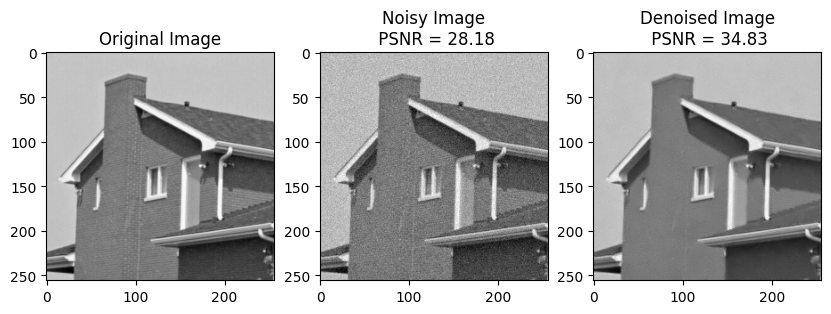

In [8]:
#plot results
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1,3,2)
plt.imshow(noisy_image_10, cmap='gray')
plt.title("Noisy Image\n PSNR = {:.2f}".format(PSNR(image, noisy_image_10)))
plt.subplot(1,3,3)
plt.imshow(denoised_image_10, cmap='gray')
plt.title("Denoised Image\n PSNR = {:.2f}".format(PSNR(image, denoised_image_10)))
plt.show()
